In [1]:
import datetime
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_style("white", {'ytick.major.size': 10.0})
sns.set_context("poster", font_scale=1.1)

In [2]:
def convertDate(d):
    if d != '':
        dt = datetime.datetime.strptime(d, '%Y-%m-%d')
    else:
        dt = d
    return dt

countries = pd.read_csv('../input/countries.csv')
census = pd.read_csv('../input/age_gender_bkts.csv')
sessions = pd.read_csv('../input/sessions.csv')
train = pd.read_csv('../input/train_users_2.csv', converters={'date_account_created': convertDate, 'date_first_booking': convertDate})
test = pd.read_csv('../input/test_users.csv', converters={'date_account_created': convertDate})

### Play with data a little bit

In [3]:
countries

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801,fra,92.06
5,GB,54.633220,-3.432277,6883.6590,243610,eng,0.00
6,IT,41.873990,12.564167,8636.6310,301340,ita,89.40
7,NL,52.133057,5.295250,7524.3203,41543,nld,63.22
8,PT,39.553444,-7.839319,7355.2534,92090,por,95.45
9,US,36.966427,-95.844030,0.0000,9826675,eng,0.00


In [4]:
train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaT,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaT,MALE,38,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [5]:
test.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [6]:
train.signup_flow.describe()

count    213451.000000
mean          3.267387
std           7.637707
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          25.000000
Name: signup_flow, dtype: float64

In [7]:
train.signup_flow.unique()

array([ 0,  3,  2,  1, 24,  8,  6,  5, 10, 25, 12,  4, 16, 15, 20, 21, 23])

In [8]:
test.signup_flow.describe()

count    62096.000000
mean         7.813885
std         11.254291
min          0.000000
25%          0.000000
50%          0.000000
75%         23.000000
max         25.000000
Name: signup_flow, dtype: float64

In [9]:
test.signup_flow.unique()

array([ 0, 25,  8, 23, 12, 14, 21])

### Merge sessions to train

In [10]:
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435


In [3]:
sessions.action_type.replace(np.nan, '-nan-', inplace=True)
sessions = sessions.dropna(subset=['user_id']).reset_index(drop=True)
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,-nan-,NaN,Windows Desktop,319
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753
2,d1mm9tcy42,lookup,-nan-,NaN,Windows Desktop,301
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141
4,d1mm9tcy42,lookup,-nan-,NaN,Windows Desktop,435


In [4]:
sessions.device_type.unique()

array(['Windows Desktop', '-unknown-', 'Mac Desktop', 'Android Phone',
       'iPhone', 'iPad Tablet', 'Android App Unknown Phone/Tablet',
       'Linux Desktop', 'Tablet', 'Chromebook', 'Blackberry', 'iPodtouch',
       'Windows Phone', 'Opera Phone'], dtype=object)

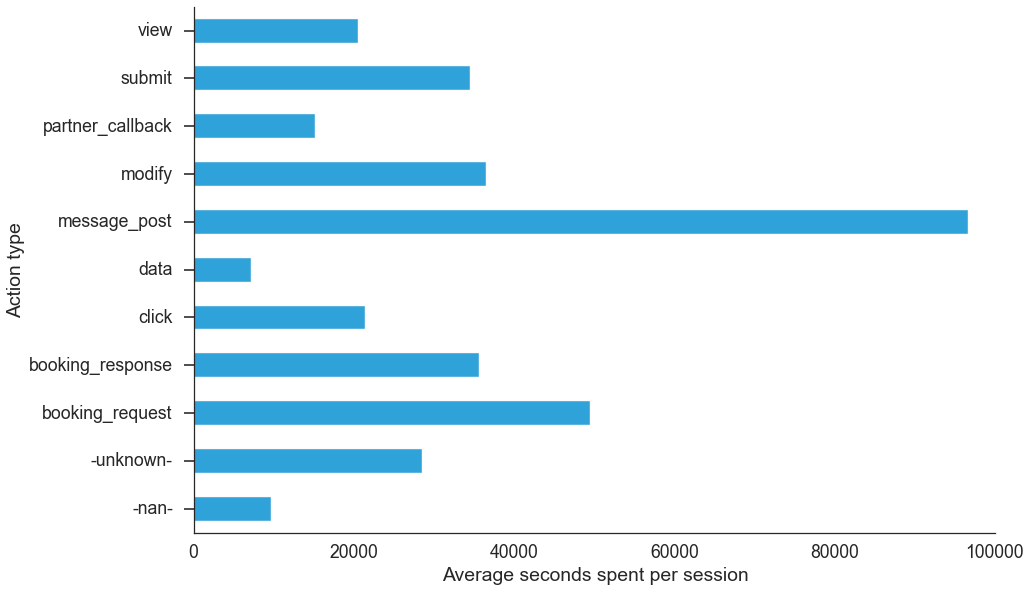

In [12]:
secs_per_session_by_action = sessions.groupby('action_type').secs_elapsed.sum()/sessions.action_type.value_counts(dropna=False)
secs_per_session_by_action.plot(kind='barh', rot=0)
plt.xlabel('Average seconds spent per session')
plt.ylabel('Action type')
sns.despine()
plt.show()

In [15]:
sessions[sessions.user_id=='d1mm9tcy42'].groupby('action_type').secs_elapsed.sum()/sessions[sessions.user_id=='d1mm9tcy42'].action_type.value_counts(dropna=False)

-nan-             526.918919
-unknown-       46204.750000
click           35259.900000
data              707.142857
message_post             NaN
submit            882.000000
view            92302.600000
dtype: float64

In [16]:
sessions[(sessions.user_id=='d1mm9tcy42')&(sessions.action_type=='message_post')]

,user_id,action,action_type,action_detail,device_type,secs_elapsed
45,d1mm9tcy42,NaN,message_post,message_post,Windows Desktop,NaN


In [17]:
sessions.secs_elapsed.describe()

count    10431706.000000
mean        19405.810751
std         88884.243208
min             0.000000
25%           229.000000
50%          1147.000000
75%          8444.000000
max       1799977.000000
Name: secs_elapsed, dtype: float64

In [25]:
print len(sessions[sessions.secs_elapsed.isnull()])

136031


In [23]:
print len(sessions[sessions.secs_elapsed==0])

104624


In [28]:
count = 0
for i in sessions.user_id.unique():
    if count == 10:
        break
    print i
    print sessions[sessions.user_id==i].action_type.value_counts(dropna=False)
    print
    count += 1

d1mm9tcy42
-nan-           37
data            35
view            25
click           20
-unknown-        8
submit           1
message_post     1
dtype: int64

yo8nz8bqcq
view      3
data      3
submit    1
click     1
-nan-     1
dtype: int64

4grx6yxeby
-unknown-          7
submit             4
data               2
view               1
message_post       1
booking_request    1
dtype: int64

ncf87guaf0
click        64
data         39
-nan-        27
view         12
-unknown-     9
submit        1
dtype: int64

4rvqpxoh3h
-unknown-    8
dtype: int64

c8mfesvkv0
submit    1
click     1
data      1
dtype: int64

xwxei6hdk4
submit          2
message_post    2
view            1
click           1
data            1
dtype: int64

5f45ro5uzk
click        12
data         12
-nan-        10
view          9
-unknown-     2
submit        1
dtype: int64

ro2stddszp
data            11
click            9
view             8
-nan-            7
submit           3
message_post     3
-unknown-        2
dtyp

In [42]:
count = 0
for i in sessions.user_id.unique():
    if count == 10:
        break
    print i
    print sessions[sessions.user_id==i].action_type.value_counts(dropna=False).idxmax(axis=1)
    print
    count += 1

d1mm9tcy42
-nan-

yo8nz8bqcq
view

4grx6yxeby
-unknown-

ncf87guaf0
click

4rvqpxoh3h
-unknown-

c8mfesvkv0
submit

xwxei6hdk4
submit

5f45ro5uzk
click

ro2stddszp
data

qtw88d9pbl
click



In [40]:
count = 0
for i in sessions.user_id.unique():
    if count == 10:
        break
    print i
    print sessions[sessions.user_id==i].groupby('action_type').secs_elapsed.sum()/sessions[sessions.user_id==i].action_type.value_counts(dropna=False)
    print
    count += 1

d1mm9tcy42
-nan-             526.918919
-unknown-       46204.750000
click           35259.900000
data              707.142857
message_post             NaN
submit            882.000000
view            92302.600000
dtype: float64

yo8nz8bqcq
-nan-       4080.000000
click     115983.000000
data        5815.666667
submit              NaN
view       23444.000000
dtype: float64

4grx6yxeby
-unknown-           55511.142857
booking_request      1000.000000
data                33254.000000
message_post        59801.000000
submit             154483.250000
view                 1624.000000
dtype: float64

ncf87guaf0
-nan-          1327.296296
-unknown-     25824.666667
click         32645.265625
data            977.717949
submit                 NaN
view         113284.416667
dtype: float64

4rvqpxoh3h
action_type
-unknown-    319.375
dtype: float64

c8mfesvkv0
click     1371616
data         8672
submit        NaN
dtype: float64

xwxei6hdk4
click           46262
data             1246
message_post 

In [41]:
count = 0
for i in sessions.user_id.unique():
    if count == 10:
        break
    print i
    print (sessions[sessions.user_id==i].groupby('action_type').secs_elapsed.sum()/sessions[sessions.user_id==i].action_type.value_counts(dropna=False)).idxmax(axis=1)
    print
    count += 1

d1mm9tcy42
view

yo8nz8bqcq
click

4grx6yxeby
submit

ncf87guaf0
view

4rvqpxoh3h
-unknown-

c8mfesvkv0
click

xwxei6hdk4
click

5f45ro5uzk
-unknown-

ro2stddszp
view

qtw88d9pbl
-unknown-



In [43]:
count = 0
for i in sessions.user_id.unique():
    if count == 10:
        break
    print i
    print sessions[sessions.user_id==i].device_type.value_counts(dropna=False).idxmax(axis=1)
    print
    count += 1

d1mm9tcy42
Windows Desktop

yo8nz8bqcq
Mac Desktop

4grx6yxeby
Windows Desktop

ncf87guaf0
Windows Desktop

4rvqpxoh3h
iPhone

c8mfesvkv0
iPad Tablet

xwxei6hdk4
iPad Tablet

5f45ro5uzk
Windows Desktop

ro2stddszp
Mac Desktop

qtw88d9pbl
Mac Desktop



In [44]:
count = 0
for i in sessions.user_id.unique():
    if count == 10:
        break
    print i
    print (sessions[sessions.user_id==i].groupby('device_type').secs_elapsed.sum()/sessions[sessions.user_id==i].device_type.value_counts(dropna=False)).idxmax(axis=1)
    print
    count += 1

d1mm9tcy42
Windows Desktop

yo8nz8bqcq
Mac Desktop

4grx6yxeby
Windows Desktop

ncf87guaf0
Android Phone

4rvqpxoh3h
iPhone

c8mfesvkv0
iPad Tablet

xwxei6hdk4
iPhone

5f45ro5uzk
Windows Desktop

ro2stddszp
Mac Desktop

qtw88d9pbl
Mac Desktop



In [5]:
sessions_parsed = pd.DataFrame(columns=['id','most_freq_action_type','most_time_action_type',
                                        'most_freq_device_type','most_time_device_type',
                                        'tot_time_elapsed','avg_time_elapsed'])
sessions_parsed.id = sessions.user_id.unique()
sessions_parsed.head()

,id,most_freq_action_type,most_time_action_type,most_freq_device_type,most_time_device_type,tot_time_elapsed,avg_time_elapsed
0,d1mm9tcy42,NaN,NaN,NaN,NaN,NaN,NaN
1,yo8nz8bqcq,NaN,NaN,NaN,NaN,NaN,NaN
2,4grx6yxeby,NaN,NaN,NaN,NaN,NaN,NaN
3,ncf87guaf0,NaN,NaN,NaN,NaN,NaN,NaN
4,4rvqpxoh3h,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_action = sessions.groupby(['user_id','action_type'],as_index=False).aggregate(np.count_nonzero).rename(columns={'action':'a_count'}).drop(['action_detail','device_type','secs_elapsed'],axis=1)
df_action['secs_action'] = sessions.groupby(['user_id','action_type'],as_index=False).aggregate(np.sum)['secs_elapsed']
df_device = sessions.groupby(['user_id','device_type'],as_index=False).aggregate(np.count_nonzero).rename(columns={'action':'d_count'}).drop(['action_detail','action_type','secs_elapsed'],axis=1)
df_device['secs_device'] = sessions.groupby(['user_id','device_type'],as_index=False).aggregate(np.sum)['secs_elapsed']

In [16]:
df_action.loc[[2,6,10],'action_type'].values

array(['click', 'view', 'data'], dtype=object)

In [6]:
print len(df_action.user_id.unique())

135483


In [ ]:
a_count_idx = np.zeros(len(df_action.user_id.unique()))
count = 0
for i in df_action.user_id.unique():
    a_count_idx[count] = df_action[df_action.user_id==i].a_count.idxmax(axis=1)
    count += 1
a_count_idx

In [11]:
np_action = df_action.values
np_action

array([['00023iyk9l', '-nan-', 3, 977.0],
       ['00023iyk9l', 'booking_request', 1, 0.0],
       ['00023iyk9l', 'click', 4, 590691.0],
       ..., 
       ['zzzlylp57e', 'message_post', 1, 8866.0],
       ['zzzlylp57e', 'submit', 3, 18477.0],
       ['zzzlylp57e', 'view', 20, 134664.0]], dtype=object)

In [15]:
np.unique(np_action[:,0])

array(['00023iyk9l', '0010k6l0om', '001wyh0pz8', ..., 'zzysuoqg6x',
       'zzywmcn0jv', 'zzzlylp57e'], dtype=object)

In [25]:
np_action[np_action[:,0]=='00023iyk9l'][:,1][np.argmax(np_action[np_action[:,0]=='00023iyk9l'][:,2])]

'view'

In [26]:
np_action[np_action[:,0]=='00023iyk9l'][:,1][np.argmax(np_action[np_action[:,0]=='00023iyk9l'][:,3])]

'click'

In [40]:
freq_action = [np_action[np_action[:,0]==i][:,1][np.argmax(np_action[np_action[:,0]==i][:,2])] for i in np.unique(np_action[:,0])]
freq_action

KeyboardInterrupt: 

In [36]:
sessions_parsed = pd.DataFrame(columns=['id','most_freq_action_type','most_time_action_type',
                                        'most_freq_device_type','most_time_device_type',
                                        'tot_time_elapsed','avg_time_elapsed'])
sessions_parsed.id = np.unique(np_action[:,0])
sessions_parsed.head()

,id,most_freq_action_type,most_time_action_type,most_freq_device_type,most_time_device_type,tot_time_elapsed,avg_time_elapsed
0,00023iyk9l,NaN,NaN,NaN,NaN,NaN,NaN
1,0010k6l0om,NaN,NaN,NaN,NaN,NaN,NaN
2,001wyh0pz8,NaN,NaN,NaN,NaN,NaN,NaN
3,0028jgx1x1,NaN,NaN,NaN,NaN,NaN,NaN
4,002qnbzfs5,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
for i,j in sessions_parsed.id.iteritems():
    sessions_parsed.loc[i,'most_freq_action_type'] = np_action[np_action[:,0]==j][:,1][np.argmax(np_action[np_action[:,0]==j][:,2])]
    sessions_parsed.loc[i,'most_time_action_type'] = np_action[np_action[:,0]==j][:,1][np.argmax(np_action[np_action[:,0]==j][:,3])]
sessions_parsed.head()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

KeyboardInterrupt: 

In [34]:
np.unique(np_action[:,0])

array(['00023iyk9l', '0010k6l0om', '001wyh0pz8', ..., 'zzysuoqg6x',
       'zzywmcn0jv', 'zzzlylp57e'], dtype=object)

In [8]:
df_device.head()

,user_id,device_type,d_count,secs_elapsed
0,00023iyk9l,Mac Desktop,36,295642
1,00023iyk9l,iPhone,4,572254
2,0010k6l0om,Mac Desktop,63,586543
3,001wyh0pz8,Android App Unknown Phone/Tablet,90,282965
4,0028jgx1x1,-unknown-,30,297010


In [10]:
count = 0
for i,j in sessions_parsed.id.iteritems():
    if count == 30:
        break
    sessions_parsed.loc[i,'tot_time_elapsed'] = sessions[sessions.user_id==j].secs_elapsed.sum()
    sessions_parsed.loc[i,'avg_time_elapsed'] = sessions[sessions.user_id==j].secs_elapsed.sum()/len(sessions[sessions.user_id==j])
    sessions_parsed.loc[i,'most_freq_action_type'] = df_action.loc[df_action[df_action.user_id==j].a_count.idxmax(axis=1),'action_type']
    sessions_parsed.loc[i,'most_time_action_type'] = df_action.loc[df_action[df_action.user_id==j].a_count.idxmax(axis=1),'secs_elapsed']
    sessions_parsed.loc[i,'most_freq_device_type'] = df_device.loc[df_device[df_device.user_id==j].d_count.idxmax(axis=1),'device_type']
    sessions_parsed.loc[i,'most_time_device_type'] = df_device.loc[df_device[df_device.user_id==j].d_count.idxmax(axis=1),'secs_elapsed']
    count += 1
sessions_parsed.head(30)

,id,most_freq_action_type,most_time_action_type,most_freq_device_type,most_time_device_type,tot_time_elapsed,avg_time_elapsed
0,d1mm9tcy42,-nan-,view,Windows Desktop,Windows Desktop,3427529,26988.42
1,yo8nz8bqcq,view,click,Mac Desktop,Mac Desktop,207842,23093.56
2,4grx6yxeby,-unknown-,submit,Windows Desktop,Windows Desktop,1135444,70965.25
3,ncf87guaf0,click,view,Windows Desktop,Android Phone,3755100,24704.61
4,4rvqpxoh3h,-unknown-,-unknown-,iPhone,iPhone,2555,319.375
5,c8mfesvkv0,submit,click,iPad Tablet,iPad Tablet,1380288,460096
6,xwxei6hdk4,submit,click,iPad Tablet,iPhone,49673,7096.143
7,5f45ro5uzk,click,-unknown-,Windows Desktop,Windows Desktop,605413,13161.15
8,ro2stddszp,data,view,Mac Desktop,Mac Desktop,1284401,29869.79
9,qtw88d9pbl,click,-unknown-,Mac Desktop,Mac Desktop,2868205,7879.684


In [13]:
count = 0
for i,j in sessions_parsed.id.iteritems():
    if count == 30:
        break
    sessions_parsed.loc[i,'tot_time_elapsed'] = sessions[sessions.user_id==j].secs_elapsed.sum()
    sessions_parsed.loc[i,'avg_time_elapsed'] = sessions[sessions.user_id==j].secs_elapsed.sum()/len(sessions[sessions.user_id==j])
    sessions_parsed.loc[i,'most_freq_action_type'] = df_action.loc[df_action[df_action.user_id==j].a_count.idxmax(axis=1),'action_type']
    sessions_parsed.loc[i,'most_time_action_type'] = df_action.loc[df_action[df_action.user_id==j].secs_elapsed.idxmax(axis=1),'action_type']
    sessions_parsed.loc[i,'most_freq_device_type'] = df_device.loc[df_device[df_device.user_id==j].d_count.idxmax(axis=1),'device_type']
    sessions_parsed.loc[i,'most_time_device_type'] = df_device.loc[df_device[df_device.user_id==j].secs_elapsed.idxmax(axis=1),'device_type']
    count += 1
sessions_parsed.head(30)

,id,most_freq_action_type,most_time_action_type,most_freq_device_type,most_time_device_type,tot_time_elapsed,avg_time_elapsed
0,d1mm9tcy42,-nan-,view,Windows Desktop,Windows Desktop,3427529,26988.42
1,yo8nz8bqcq,data,click,Mac Desktop,Mac Desktop,207842,23093.56
2,4grx6yxeby,-unknown-,submit,Windows Desktop,Windows Desktop,1135444,70965.25
3,ncf87guaf0,click,click,Windows Desktop,Windows Desktop,3755100,24704.61
4,4rvqpxoh3h,-unknown-,-unknown-,iPhone,iPhone,2555,319.375
5,c8mfesvkv0,click,click,iPad Tablet,iPad Tablet,1380288,460096
6,xwxei6hdk4,message_post,click,iPad Tablet,iPhone,49673,7096.143
7,5f45ro5uzk,click,click,Windows Desktop,Windows Desktop,605413,13161.15
8,ro2stddszp,data,view,Mac Desktop,Mac Desktop,1284401,29869.79
9,qtw88d9pbl,click,view,Mac Desktop,Mac Desktop,2868205,7879.684


In [61]:
print len(sessions.user_id.unique()), len(train.id.unique()), len(test.id.unique())

135483 213451 62096


In [52]:
users = pd.concat((train, test), axis=0, ignore_index=True)

In [62]:
print len(sessions_parsed), len(sessions_parsed[sessions_parsed.id.isin(users.id.unique())])

135483 135483


In [66]:
print 'Percentage of user sessions data available: %d' % (len(sessions_parsed[sessions_parsed.id.isin(users.id.unique())])/float(len(users.id.unique()))*100)

Percentage of user sessions data available: 49
